# Case-2: Single Signal, No noise, Directional Interference

* Example: Considering a 5 antenna element system, create a beamformer w that protects the signals that arrive with angle pi/3 while at the same time it zero-forces signals from interfering sources at angles 0, pi/6, and -pi/3.

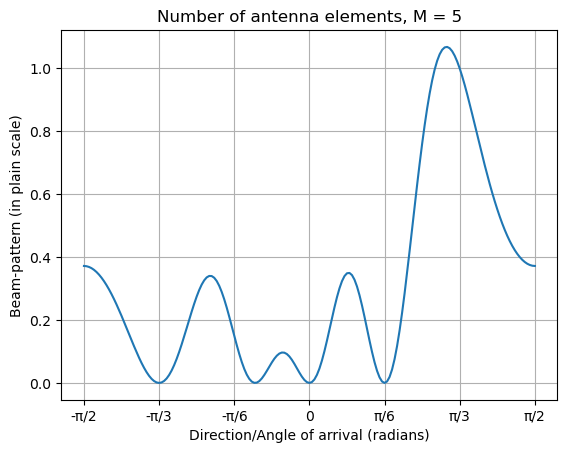

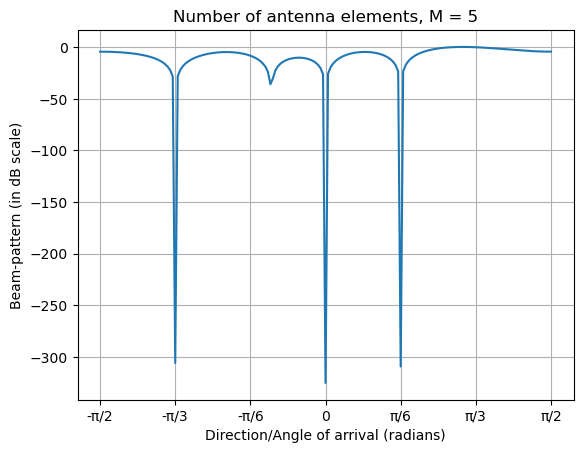

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
phi = np.linspace(-np.pi / 2, np.pi / 2, 181)  # Direction of arrival (DoA/AoA)
M = 5  # Number of antenna elements
K = 3  # Number of interferers
phis = [np.pi / 3, 0, np.pi / 6, -np.pi / 3]  # Angles of interest and interferers

# Calculate array response vectors for sources and interferers
s = np.zeros((M, len(phis)), dtype=complex)  # Preallocate the response matrix
for j in range(len(phis)):
    for i in range(M):
        s[i, j] = np.exp(-1j * np.pi * (M - i - 1) * np.sin(phis[j]))

A = s  # Defined matrix of array response vectors
w = A @ np.linalg.inv(A.conj().T @ A) @ np.array([1] + [0] * K)  # Zero-forcing beamformer

# Calculate array response vectors for all angles
s1 = np.zeros((M, len(phi)), dtype=complex)  # Preallocate response vectors for plotting
for j in range(len(phi)):
    for i in range(M):
        s1[i, j] = np.exp(-1j * np.pi * (M - i - 1) * np.sin(phi[j]))

# Compute the beam-pattern
bmp = np.abs(w.conj().T @ s1)**2  # Magnitude squared of beam-pattern

# Plotting beam-pattern versus DoA/AoA
plt.figure()
plt.plot(phi, bmp)
plt.xlabel('Direction/Angle of arrival (radians)')
plt.ylabel('Beam-pattern (in plain scale)')
plt.title(f'Number of antenna elements, M = {M}')
plt.xticks(
    [-np.pi / 2, -np.pi / 3, -np.pi / 6, 0, np.pi / 6, np.pi / 3, np.pi / 2],
    labels=['-π/2', '-π/3', '-π/6', '0', 'π/6', 'π/3', 'π/2']
)
plt.grid(True)

# Plotting received signal energy (in dB scale) versus DoA/AoA
plt.figure()
plt.plot(phi, 10 * np.log10(bmp))
plt.xlabel('Direction/Angle of arrival (radians)')
plt.ylabel('Beam-pattern (in dB scale)')
plt.title(f'Number of antenna elements, M = {M}')
plt.xticks(
    [-np.pi / 2, -np.pi / 3, -np.pi / 6, 0, np.pi / 6, np.pi / 3, np.pi / 2],
    labels=['-π/2', '-π/3', '-π/6', '0', 'π/6', 'π/3', 'π/2']
)
plt.grid(True)

# Show plots
plt.show()

* By increasing the antennas, we can achieve a fine tuned beamformer that protects the SOI and zero-forces interference.

    - Beam Width Reduction: The beamwidth of the main lobe in a beamformer narrows as the number of antennas increases. A narrow beamwidth allows the beamformer to focus more precisely on the desired direction of arrival (DoA), minimizing interference from adjacent angles.
	- Better Angle Differentiation: With more antennas, the system can differentiate signals arriving from closely spaced angles more effectively, improving the system’s ability to isolate the desired signal.
    - A larger number of antennas increases the energy focused in the desired direction while reducing the energy in unwanted directions.
    - As the number of antennas increases, the beamformer has more degrees of freedom to nullify interference from undesired directions.
	- In systems with multiple interferers, a larger antenna array can effectively suppress signals from interfering sources without affecting the desired signal.
    - For a system with  M  antennas and  K  interferers, the beamformer can use  M - K  degrees of freedom to optimize the beam pattern.

* Trade-offs
    - Cost: More antennas mean higher hardware costs and complexity.
	- Computational Load: Beamforming algorithms become more computationally intensive with larger arrays.
	- Space and Deployment: A larger array may require more physical space, which can be challenging in some scenarios.

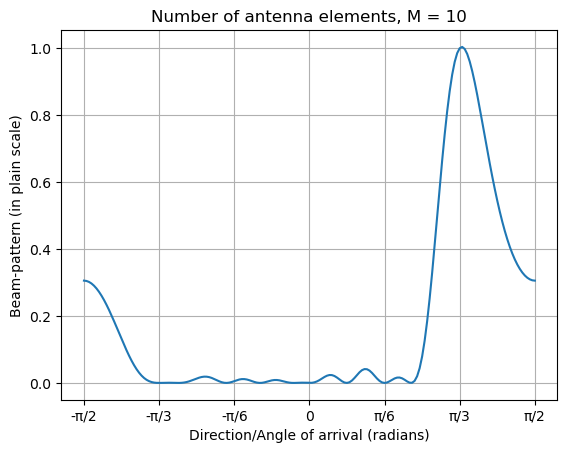

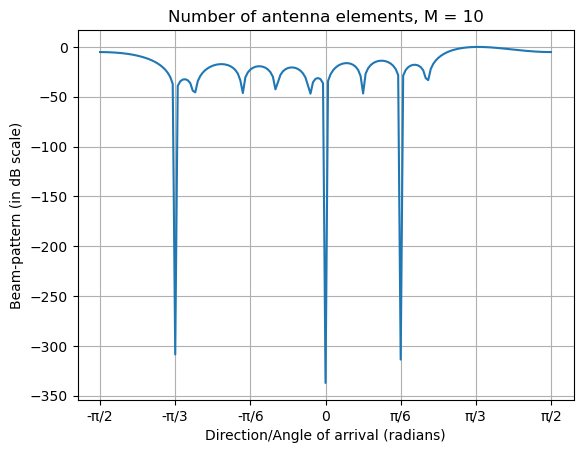

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
phi = np.linspace(-np.pi / 2, np.pi / 2, 181)  # Direction of arrival (DoA/AoA)
M = 10  # Number of sensors (antenna elements)
K = 3  # Number of interferers
phis = [np.pi / 3, 0, np.pi / 6, -np.pi / 3]  # Angles of interest and interferers

# Calculate array response vectors for sources and interferers
s = np.zeros((M, len(phis)), dtype=complex)  # Initialize response matrix
for j in range(len(phis)):  # Loop over angles of interest and interferers
    for i in range(M):  # Loop over antenna elements
        s[i, j] = np.exp(-1j * np.pi * (M - i - 1) * np.sin(phis[j]))

A = s  # Defined matrix of array response vectors
w = A @ np.linalg.inv(A.conj().T @ A) @ np.array([1] + [0] * K)  # Zero-forcing beamformer

# Calculate array response vectors for all angles (phi)
s1 = np.zeros((M, len(phi)), dtype=complex)  # Initialize response vectors for plotting
for j in range(len(phi)):  # Loop over all angles
    for i in range(M):  # Loop over antenna elements
        s1[i, j] = np.exp(-1j * np.pi * (M - i - 1) * np.sin(phi[j]))

# Compute the beam-pattern
bmp = np.abs(w.conj().T @ s1)**2  # Magnitude squared of the beam-pattern

# Plotting beam-pattern versus DoA/AoA
plt.figure()
plt.plot(phi, bmp)
plt.xlabel('Direction/Angle of arrival (radians)')
plt.ylabel('Beam-pattern (in plain scale)')
plt.title(f'Number of antenna elements, M = {M}')
plt.xticks(
    [-np.pi / 2, -np.pi / 3, -np.pi / 6, 0, np.pi / 6, np.pi / 3, np.pi / 2],
    labels=['-π/2', '-π/3', '-π/6', '0', 'π/6', 'π/3', 'π/2']
)
plt.grid(True)

# Plotting received signal energy (in dB scale) versus DoA/AoA
plt.figure()
plt.plot(phi, 10 * np.log10(bmp))
plt.xlabel('Direction/Angle of arrival (radians)')
plt.ylabel('Beam-pattern (in dB scale)')
plt.title(f'Number of antenna elements, M = {M}')
plt.xticks(
    [-np.pi / 2, -np.pi / 3, -np.pi / 6, 0, np.pi / 6, np.pi / 3, np.pi / 2],
    labels=['-π/2', '-π/3', '-π/6', '0', 'π/6', 'π/3', 'π/2']
)
plt.grid(True)

# Show the plots
plt.show()